# imports

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_contract = pd.read_csv('contract.csv')
df_personal = pd.read_csv('personal.csv')
df_internet = pd.read_csv('internet.csv')
df_phone = pd.read_csv('phone.csv')

In [3]:
def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls %'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    df_nulls = df_nulls.sort_values("Percent of Nulls %",ascending=False)
    return df_nulls

def explore(df):
    df = df
    display(df.head())
    print("Number of duplicated rows",df.duplicated().sum())
    print("Data shape",df.shape)
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    display(df.info())
    display(df.describe())
    display(df.describe(include='object'))
    print("Number of duplicated rows")
    display(df.duplicated().sum())


# Data exploration

In [4]:
for df in (df_contract, df_personal, df_internet, df_phone):
    display(df.head() )

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### Joining the data on custumer ID in order to explore it all togerher

In [5]:
from functools import reduce

dfs = [df_contract, df_internet, df_personal, df_phone]
df = reduce(lambda left,right: pd.merge(left,right,on='customerID', how='outer'), dfs)
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [6]:
#now that the data is all together lets explore it

explore(df)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


Number of duplicated rows 0
Data shape (7043, 20)
Columns with nulls:


,Missing Values,Percent of Nulls %
OnlineBackup,1526,21.67
InternetService,1526,21.67
StreamingMovies,1526,21.67
StreamingTV,1526,21.67
TechSupport,1526,21.67
DeviceProtection,1526,21.67
OnlineSecurity,1526,21.67
MultipleLines,682,9.68
TotalCharges,0,0.00
MonthlyCharges,0,0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       6361 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


None

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,Partner,Dependents,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,7043,7043,7043,6361
unique,7043,77,5,3,2,4,6531,2,2,2,2,2,2,2,2,2,2,2
top,3853-LYGAM,2014-02-01,No,Month-to-month,Yes,Electronic check,,Fiber optic,No,No,No,No,No,No,Male,No,No,No
freq,1,366,5174,3875,4171,2365,11,3096,3498,3088,3095,3473,2810,2785,3555,3641,4933,3390


Number of duplicated rows


0

There are no  duplicates. some rows have missing values, I asume that it comes together and it is just a typo that is supossed to be "No"

In [7]:
df[df['OnlineBackup'].isnull()].head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
11,7469-LKBCI,2018-10-01,No,Two year,No,Credit card (automatic),18.95,326.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
16,8191-XWSZG,2015-10-01,No,One year,No,Mailed check,20.65,1022.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No
21,1680-VDCWW,2019-02-01,No,One year,No,Bank transfer (automatic),19.80,202.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,No,No
22,1066-JKSGK,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
33,7310-EGVHZ,2020-01-01,No,Month-to-month,No,Bank transfer (automatic),20.20,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No


as I suspected The missing values comes together since they are conected to internet services, I will fill them with No

In [8]:
df = df.fillna("No")

In [9]:
get_precent_of_na_df(df,4)

,Missing Values,Percent of Nulls %
customerID,0,0.0
BeginDate,0,0.0
Dependents,0,0.0
Partner,0,0.0
SeniorCitizen,0,0.0
gender,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0


In [10]:
# The goal is to predict if a client would leave so the leave date is irelevant
df['EndDate'] = np.where(df['EndDate']=='No', "No", "Yes")
df['EndDate'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: EndDate, dtype: object

In [11]:
#Fixing the date tyme columns
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')


In [12]:
#Fixing the total charges to float
space_index = list(df[df['TotalCharges'].str.isspace()].index)
df.loc[space_index, 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [13]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No
4,9237-HQITU,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


# Graphs


### Corelation

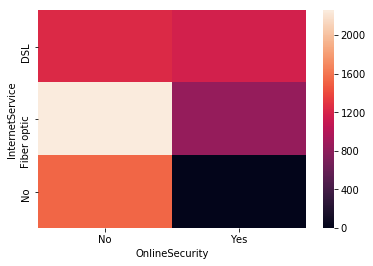

In [17]:
# conver to co-occurance matrix
co_mat = pd.crosstab(df.InternetService, df.OnlineSecurity
                    )
co_mat
sns.heatmap(co_mat)

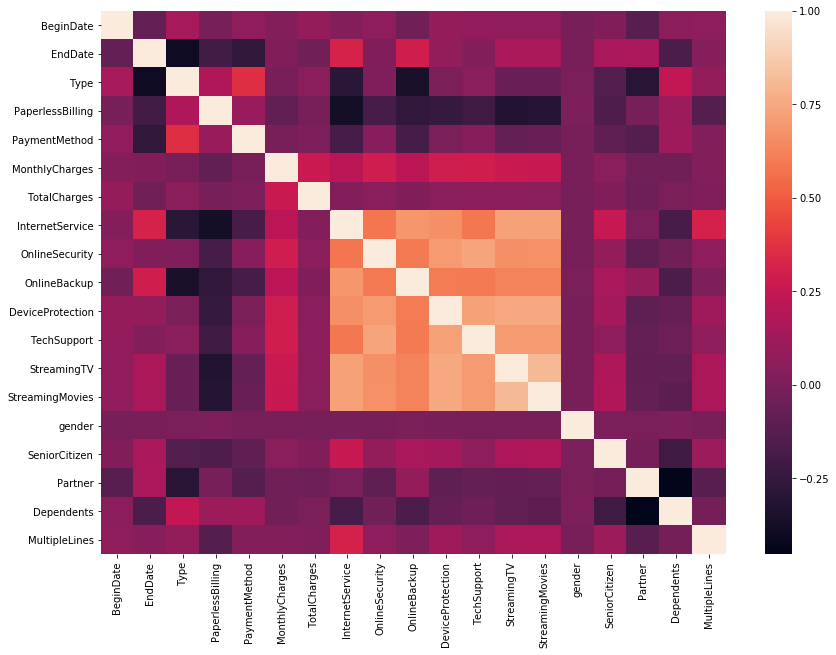

In [31]:
df_to_corr = df.drop(['customerID'], axis=1)
corr=df_to_corr.apply(lambda x: x.factorize()[0]).corr()
fig=plt.figure(figsize=(14, 10))
fig=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



It can bee seen that there is high corelation between the 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies's'
Will check if removing some of them will improve the model

### Checking if the target is balanced





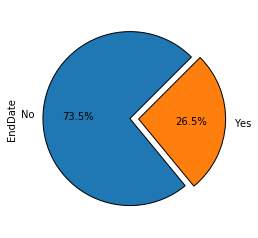

In [73]:
df['EndDate'].value_counts().plot.pie(startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.1))

most of the custumers didnt keave, good for rhe company but bad for thr data scientist, will balance it later

### Demografic data


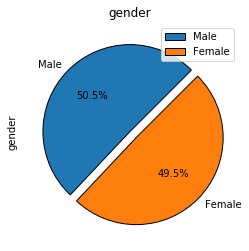

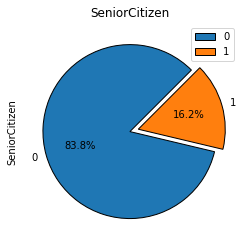

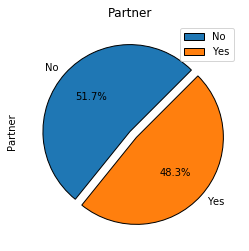

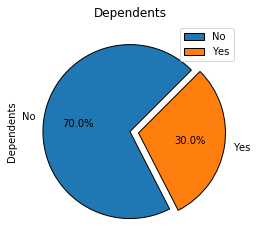

In [72]:

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in cols:
    df[col].value_counts(dropna=False).plot.pie(startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.1))
    plt.legend(loc = 'upper right')
    plt.title(col)
    plt.show()


Only 16% are senior citezens and most of the clients dont have kids

### User preferences


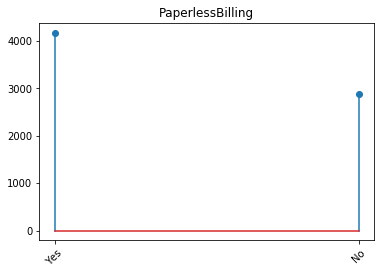

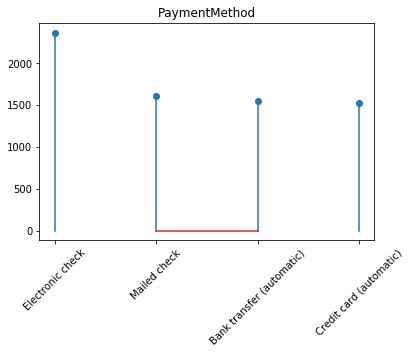

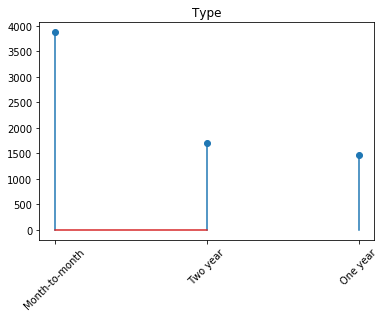

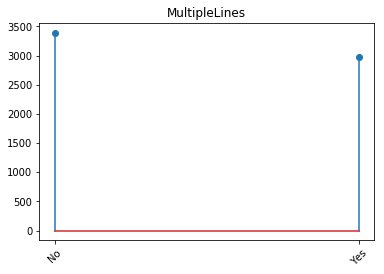

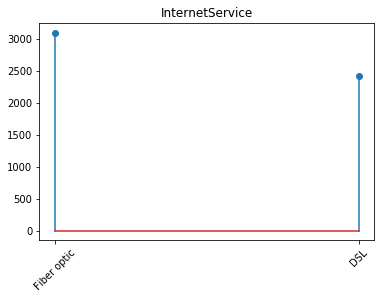

In [142]:

cols = ['PaperlessBilling', 'PaymentMethod', 'Type', 'MultipleLines','InternetService']
for col in cols:
    a= pd.value_counts(df[col])
 
    plt.stem(a.index,a)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

Moost people but not enough prefer electronoc billing, it can save money and the inviorment, most of the people prefer monthly payment

### Money

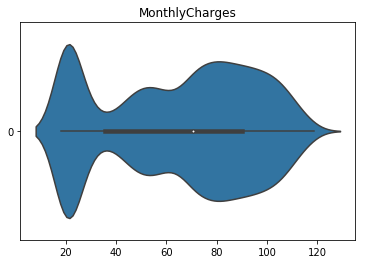

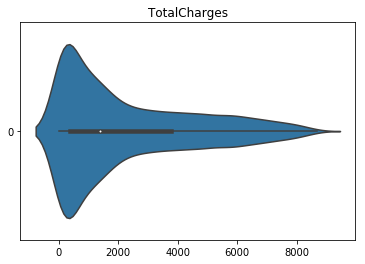

In [103]:

cols = ['MonthlyCharges', 'TotalCharges']
for col in cols:
    sns.violinplot(data=df[col], orient='h')   
    plt.title(col)
    plt.show()

Both monthly and total charges arent normaly distributed

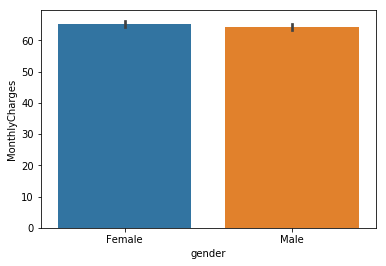

In [105]:
ax=sns.barplot(x="gender", y="MonthlyCharges", data=df)

### Corelation to the target

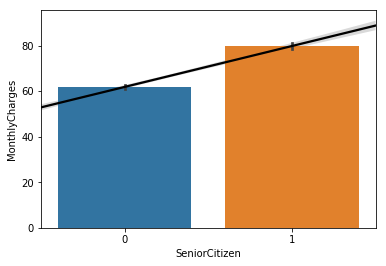

In [145]:
ax=sns.barplot(x="SeniorCitizen", y="MonthlyCharges", data=df)
ax=sns.regplot(df.SeniorCitizen, df.MonthlyCharges, scatter=False,color = 'black')

In [ ]:
ax=sns.barplot(x="SeniorCitizen", y="MonthlyCharges", data=df)

Man and women pay similar monthly and senior xitizens pay more

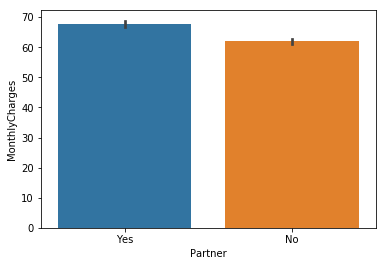

In [150]:
ax=sns.barplot(x="Partner", y="MonthlyCharges", data=df)

Man/women pay similar monthly and senior xitizens pay more in a visible way , Partner and dependends dont make much differense

# questions

1. Senior citizens pay visibly more- is it because they consume more or do they are convinced to buy stuff they dont need?

2. The online services are redundant , how will it affect overfitting?
3. What is the reason that nor the monthly charge nor the year charge balanced

# Plan

1. data exploration - dealing with missing data, converting to the right data type, Graphs

2. Data preperation for model selection/feature engineering- Converting data to binary, perhaps deleting redundant variables, data balancing, spliting the data to train test split

3. Model training - trying different models and different hyperparameters for train and vslidation set
4. Model selection - selecting the best model by testing it on the test set